# Difference between tensorflow and Keras

In [1]:
!pip install keras

     ---------------------------------------- 1.7/1.7 MB 1.3 MB/s eta 0:00:00


You should consider upgrading via the 'c:\users\sayan\anaconda3\python.exe -m pip install --upgrade pip' command.


In [3]:
!pip install tensorflow

     ------------------------------------ 266.3/266.3 MB 962.9 kB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 KB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 4.1 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 23.2/23.2 MB 4.2 MB/s eta 0:00:00
     -------------------------------------- 439.2/439.2 KB 2.7 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 KB 1.7 MB/s eta 0:00:00
     -------------------------------------- 126.5/126.5 KB 3.8 MB/s eta 0:00:00
     ---------------------------------------- 6.0/6.0 MB 4.5 MB/s eta 0:00:00
     -------------------------------------- 177.8/177.8 KB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 93.3/93.3 KB 2.7 MB/s eta 0:00:00
     -------------------------------------- 781.3/781.3 KB 3.8 MB/s eta 0:00:00


You should consider upgrading via the 'c:\users\sayan\anaconda3\python.exe -m pip install --upgrade pip' command.


     -------------------------------------- 155.3/155.3 KB 4.7 MB/s eta 0:00:00
     ---------------------------------------- 77.1/77.1 KB 4.2 MB/s eta 0:00:00
     -------------------------------------- 151.7/151.7 KB 2.2 MB/s eta 0:00:00
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 3.10.0
    Uninstalling importlib-metadata-3.10.0:
      Successfully uninstalled importlib-metadata-3.10.0


In [45]:
!pip install pydot

You should consider upgrading via the 'c:\users\sayan\anaconda3\python.exe -m pip install --upgrade pip' command.


In [4]:
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten #layers sub module is to write the layers im MLP
from keras.models import Sequential
from keras.utils import to_categorical
from keras.datasets import mnist
from keras import utils

In [81]:
import numpy as np
import pandas as pd

In [5]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

11490434/11490434 [==============================] - 4s 0us/step


In [9]:
Y_test.shape

(10000,)

In [12]:
X_train.shape #There are 60000 rows each containing an image of 28 pixels*28 pixels

(60000, 28, 28)

In [39]:
Y_train.shape

(60000,)

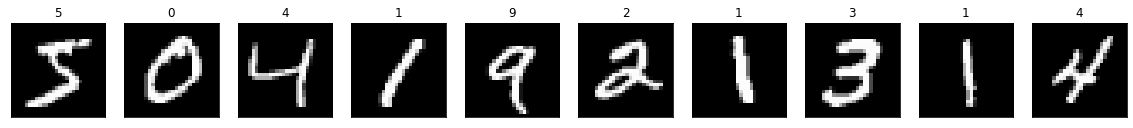

In [24]:
fig,axes=plt.subplots(ncols=10,sharex=False,sharey=True,figsize=(20,4))
for i in range(10):
    axes[i].set_title(Y_train[i])
    axes[i].imshow(X_train[i],cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [26]:
Y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [36]:
y_train=to_categorical(Y_train)
y_test=to_categorical(Y_test)

In [37]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [38]:
Y_train[0]

5

In [41]:
y_train.shape

(60000, 10)

In [42]:
model=Sequential()
model.add(Flatten(input_shape=(28,28))) #we have to flatten the matrix since MLP takes only one dimensional data.
#the input layer is made automatically. Here the input layer has (28*28=784) nodes.
model.add(Dense(10,activation='sigmoid')) #first hidden layer is added #dense indicates that the networks are fully connected.
model.add(Dense(5,activation='sigmoid'))
model.add(Dense(10,activation='softmax')) #for multiclass classification we prefer softmax activation in the last layer.

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 10)                60        
                                                                 
Total params: 7,965
Trainable params: 7,965
Non-trainable params: 0
_________________________________________________________________


In [44]:
utils.plot_model(model,show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [47]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])
#since this is multiclass classifiation, we are using 'categorical_crossentropy' loss function

In [48]:
model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test))
#Here we have not mentioned any batch size. So the model takes batch size 32 as default.
#60000/32=1875
#Out of 60000 images, only 1875 images are being sent in one epoch.

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 1.8529 - acc: 0.3564 - val_loss: 1.4914 - val_acc: 0.4829
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3542 - acc: 0.5389 - val_loss: 1.2159 - val_acc: 0.5655
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.1253 - acc: 0.5928 - val_loss: 1.0761 - val_acc: 0.6055
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0484 - acc: 0.6235 - val_loss: 1.0095 - val_acc: 0.6214
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0030 - acc: 0.6398 - val_loss: 0.9632 - val_acc: 0.6653
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9571 - acc: 0.6668 - val_loss: 0.8922 - val_acc: 0.6858
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9047 - acc: 0.6806 - val_loss: 0.8969 - val_acc: 0.6882
Epoch 8/20
1875/1875 [==============================] - 5s 3ms

In [49]:
model.save('mnist_model.h5')

In [52]:
history=model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6189 - acc: 0.8213 - val_loss: 0.5590 - val_acc: 0.8390
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5801 - acc: 0.8329 - val_loss: 0.5382 - val_acc: 0.8467
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5747 - acc: 0.8345 - val_loss: 0.5508 - val_acc: 0.8471
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6109 - acc: 0.8207 - val_loss: 0.5691 - val_acc: 0.8280
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5666 - acc: 0.8301 - val_loss: 0.5674 - val_acc: 0.8264
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5558 - acc: 0.8370 - val_loss: 0.5393 - val_acc: 0.8482
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5617 - acc: 0.8332 - val_loss: 0.5678 - val_acc: 0.8332
Epoch 8/20
1875/1875 [==============================] - 5s 3ms

In [66]:
history.history

{'loss': [0.6188963055610657,
  0.5801178216934204,
  0.5747296810150146,
  0.6108883023262024,
  0.5665664076805115,
  0.5558371543884277,
  0.5617020130157471,
  0.5592845678329468,
  0.5626295208930969,
  0.532870352268219,
  0.541639506816864,
  0.5588958859443665,
  0.5333086252212524,
  0.5253068208694458,
  0.5244407653808594,
  0.5135942101478577,
  0.5197857022285461,
  0.5183530449867249,
  0.5199321508407593,
  0.510842502117157],
 'acc': [0.8212500214576721,
  0.8329499959945679,
  0.8344833254814148,
  0.8207166790962219,
  0.830133318901062,
  0.8369666934013367,
  0.8331999778747559,
  0.8396333456039429,
  0.8354833126068115,
  0.8416333198547363,
  0.8450333476066589,
  0.8367166519165039,
  0.8482333421707153,
  0.8481000065803528,
  0.8477333188056946,
  0.8505666851997375,
  0.8530333042144775,
  0.8492333292961121,
  0.8495000004768372,
  0.8501666784286499],
 'val_loss': [0.5589768290519714,
  0.5382113456726074,
  0.5508282780647278,
  0.5691471695899963,
  0.567

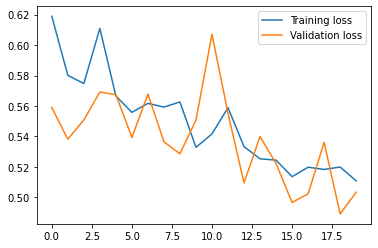

In [72]:
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.legend()

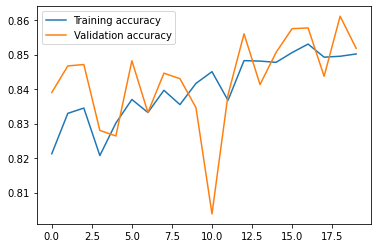

In [73]:
plt.plot(history.history['acc'],label='Training accuracy')
plt.plot(history.history['val_acc'],label='Validation accuracy')
plt.legend()

In [75]:
from keras import models

In [76]:
model=models.load_model('mnist_model.h5')

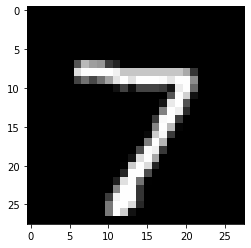

In [79]:
plt.imshow(X_test[0],cmap='gray')

In [87]:
x0=np.reshape(X_test[0],(1,28,28)) 
print(model.predict(x0)) #the model is a siftmax model which is returning the probality of each class
np.argmax(model.predict(x0)) #np.argmax returns the class for which probability is maximum.

1/1 [==============================] - 0s 35ms/step
[[3.7945374e-05 8.3194818e-06 1.4317493e-02 1.8486148e-02 4.2634722e-04
  2.5930439e-04 2.8480605e-05 9.2223763e-01 1.0324671e-02 3.3873670e-02]]
1/1 [==============================] - 0s 33ms/step


7